<a href="https://colab.research.google.com/github/maximo/crypto-analysis/blob/main/Messari_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

start = "start=2020-12-01"
end = "&end=2021-01-01"
columns = "&columns=timestamp,close,volume"
interval = "&interval=1d"
url = "https://data.messari.io/api/v1/assets/eth/metrics/price/time-series?" + start + end + interval + "&format=csv"

pd.set_option("display.max_columns", None)
df = pd.read_csv(url)

# format timestamp to YYYY-MM-DD
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d')

In [2]:
# display number of rows and columns in the dataset
df.shape

(32, 6)

In [4]:
#metrics on the dataset
df.describe()

,open,high,low,close,volume
count,32.000000,32.000000,32.000000,32.000000,3.200000e+01
mean,622.291812,642.860729,600.390544,625.805383,2.084563e+09
std,54.687381,57.754525,54.152917,57.964246,1.022157e+09
min,544.906332,560.765260,530.048223,544.497093,9.343508e+08
25%,586.378554,597.464899,563.258441,586.269982,1.408341e+09
50%,610.333540,635.382702,584.021714,609.977027,1.858415e+09
75%,639.373350,666.243237,624.040297,645.718979,2.258266e+09
max,752.356509,758.309079,721.463760,752.412845,4.715926e+09


In [6]:
df.dtypes

timestamp     object
open         float64
high         float64
low          float64
close        float64
volume       float64
dtype: object

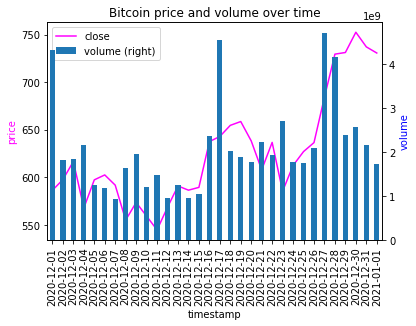

In [5]:
import matplotlib.pyplot as plt

ax = df.plot(x="timestamp", y="close", color="magenta")
ax.set_ylabel("price", color="magenta")
ax2 = df.plot(x="timestamp", y="volume", kind="bar", secondary_y=True, ax=ax)
ax2.set_ylabel("volume", color="blue")

plt.title("Bitcoin price and volume over time")
plt.show()